#📌 Extracción

In [205]:
import pandas as pd

####Creo el DataFrame datos_TelecomX

In [206]:
datos_TelecomX = pd.read_json('TelecomX_Data.json')

#🔧 Transformación

In [207]:
datos_TelecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [208]:
datos_TelecomX.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [209]:
datos_TelecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####Normalización de los datos del dataframe

In [210]:
df_customer = pd.json_normalize(datos_TelecomX['customer'])
df_phone = pd.json_normalize(datos_TelecomX['phone'])
df_internet = pd.json_normalize(datos_TelecomX['internet'])
df_account = pd.json_normalize(datos_TelecomX['account'])

####Une las columnas nuevas al DataFrame original

In [211]:
datos_TelecomX_Fla = pd.concat([datos_TelecomX, df_customer, df_phone, df_internet, df_account], axis=1)

In [212]:
datos_TelecomX_Fla.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####drop(...) elimina las columnas originales para evitar duplicación.

In [213]:
datos_TelecomX_Fla = datos_TelecomX_Fla.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [214]:
datos_TelecomX_Fla.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####Manejo de inconsistencias

In [215]:
import numpy as np

In [216]:
# Eliminar espacios (incluso si hay solo espacios)
datos_TelecomX_Fla['Charges.Total'] = datos_TelecomX_Fla['Charges.Total'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [217]:
# Reemplazar cadenas vacías (después del strip, estas serán '')
datos_TelecomX_Fla['Charges.Total'] = datos_TelecomX_Fla['Charges.Total'].replace('', np.nan)

In [218]:
# Crear resumen de valores nulos
null_summary = (
    datos_TelecomX_Fla.isna()
    .sum()
    .to_frame(name='Nulos')
    .assign(Porcentaje=lambda df: 100 * df['Nulos'] / len(datos_TelecomX_Fla))
    .query('Nulos > 0')
    .sort_values(by='Porcentaje', ascending=False)
)

print(null_summary)


               Nulos  Porcentaje
Charges.Total     11    0.151369


In [219]:
# Índices donde hay NaN
nan_indices = datos_TelecomX_Fla[datos_TelecomX_Fla['Charges.Total'].isna()].index
print(nan_indices.tolist())


[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [220]:
# Mostrar las 11 filas con NaN en Charges.Total
datos_TelecomX_Fla[datos_TelecomX_Fla['Charges.Total'].isna()]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


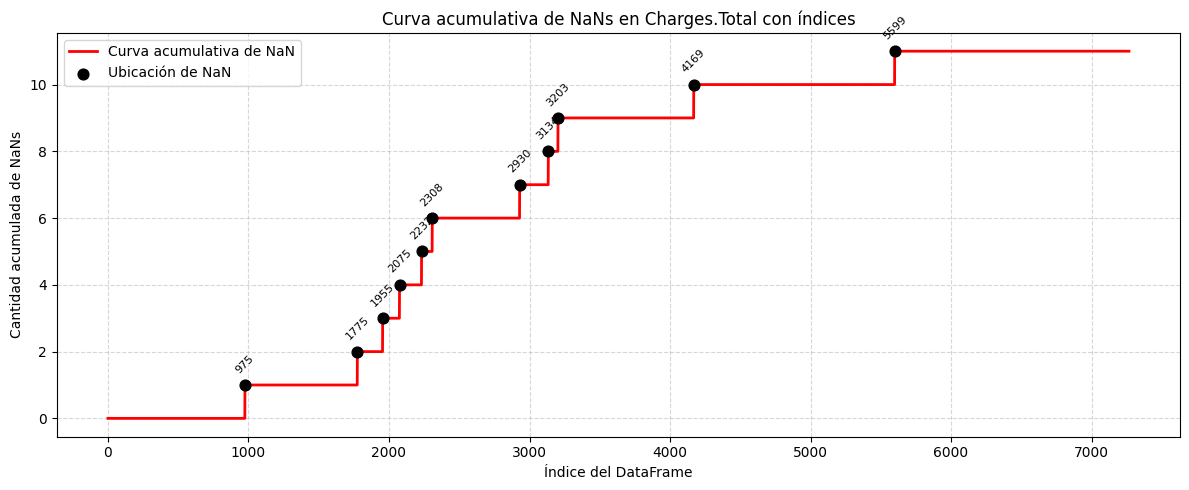

In [221]:
import matplotlib.pyplot as plt

# Serie booleana → 1 si NaN, 0 si no
nan_series = datos_TelecomX_Fla['Charges.Total'].isna().astype(int)

# Curva acumulativa
nan_cumsum = nan_series.cumsum()

# Índices y valores de los NaN
nan_indices = nan_series[nan_series == 1].index
nan_values = nan_cumsum[nan_indices]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(nan_cumsum, label='Curva acumulativa de NaN', linewidth=2, color='red')
plt.scatter(nan_indices, nan_values, color='black', label='Ubicación de NaN', zorder=5, s=60)

# Agregar etiquetas (índices)
for idx, val in zip(nan_indices, nan_values):
    plt.text(idx, val + 0.3, str(idx), ha='center', va='bottom', fontsize=8, rotation=45)

plt.title('Curva acumulativa de NaNs en Charges.Total con índices')
plt.xlabel('Índice del DataFrame')
plt.ylabel('Cantidad acumulada de NaNs')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [222]:
# Convertir a float
datos_TelecomX_Fla['Charges.Total'] = datos_TelecomX_Fla['Charges.Total'].astype(np.float64)


In [223]:
datos_TelecomX_Fla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


####Ver cuántos valores NaN hay

In [224]:
n_nan = datos_TelecomX_Fla['Charges.Total'].isna().sum()
print(f"Hay {n_nan} valores NaN en 'Charges.Total'.")

Hay 11 valores NaN en 'Charges.Total'.


###Imputar valores faltantes con la media

In [225]:
# Calcular la media ignorando los NaN
media_charges = datos_TelecomX_Fla['Charges.Total'].mean()

In [226]:
# Rellenar NaN con la media
datos_TelecomX_Fla['Charges.Total'].fillna(media_charges, inplace=True)

<ipython-input-226-1487256045>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_TelecomX_Fla['Charges.Total'].fillna(media_charges, inplace=True)


In [227]:
print(f"Se imputaron los valores faltantes con la media: {media_charges:.2f}")

Se imputaron los valores faltantes con la media: 2280.63


In [228]:
datos_TelecomX_Fla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### Lista de columnas con 'Yes'/'No'
#### Convertir a 1 (Yes), 0 (No)

In [229]:
columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling','Churn']

for col in columnas_binarias:
    datos_TelecomX_Fla[col] = datos_TelecomX_Fla[col].map(lambda x: 1 if x == 'Yes' else 0)

In [230]:
datos_TelecomX_Fla.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


####Crear la columna "Cuentas_Diarias"

In [231]:
import pandas as pd
import numpy as np

In [232]:
# TotalCharges esté en formato numérico
datos_TelecomX_Fla['Charges.Total'] = pd.to_numeric(datos_TelecomX_Fla['Charges.Total'], errors='coerce')

In [233]:
# Se evita divisiones por cero o nulas
datos_TelecomX_Fla['Cuentas_Diarias'] = datos_TelecomX_Fla.apply(
    lambda row: row['Charges.Total'] / (row['tenure'] * 30.44)
    if row['tenure'] > 0 else np.nan,
    axis=1)

In [234]:
# Redondear a 2 decimales para claridad
datos_TelecomX_Fla['Cuentas_Diarias'] = datos_TelecomX_Fla['Cuentas_Diarias'].round(2)


In [235]:
datos_TelecomX_Fla.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.17
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.98
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.31
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.13
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.93


In [236]:
datos_TelecomX_Fla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


####Ver cuántos valores NaN hay

In [237]:
n_nan = datos_TelecomX_Fla['Cuentas_Diarias'].isna().sum()
print(f"Hay {n_nan} valores NaN en 'Cuentas_Diarias'.")

Hay 11 valores NaN en 'Cuentas_Diarias'.


In [238]:
# Rellenar NaN con la media
datos_TelecomX_Fla['Cuentas_Diarias'].fillna(media_charges, inplace=True)

<ipython-input-238-1707847709>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_TelecomX_Fla['Cuentas_Diarias'].fillna(media_charges, inplace=True)


In [239]:
print(f"Se imputaron los valores faltantes con la media: {media_charges:.2f}")

Se imputaron los valores faltantes con la media: 2280.63


In [240]:
datos_TelecomX_Fla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

###Análisis descriptivo de Clientes TelecomX

In [241]:
datos_TelecomX_Fla.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,5.576305
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2266.915104,88.592566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.450000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1394.550000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.970000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,2280.634213


**Churn (Cancelación de servicio)**

  Media: 0.257 → Aproximadamente 25.7% de los clientes han cancelado.

  Mediana: 0.0 → La mayoría no ha cancelado.

  Máximo: 1 → Valor binario (0 = no canceló, 1 = canceló).

**Insight:** Hay una proporción significativa de clientes que cancelan (~1 de cada 4). Esto amerita un análisis más profundo de factores relacionados al churn.

**Tenure (Meses con la empresa)**

  Media: 32.35 meses (~2.7 años).

  Mediana: 29 meses.

  Rango: de 0 a 72 meses.

**Insight:** La mitad de los clientes tienen menos de 2.5 años con la empresa. Retenerlos a largo plazo es clave.


**Charges.Monthly (Factura mensual)**

  Media: $64.72

  Mediana: $70.30

  Rango: $18.25 a $118.75

**Insight:** Hay una buena dispersión de precios. Los clientes pagan diferentes montos según servicios contratados.

**Charges.Total (Monto total facturado)**

  Media: $2,280.63

  Mediana: $1,394.55

  Máximo: $8,684.80

**Insight:** Alta variabilidad. Algunos clientes generan mucho más valor que otros. Ideal para segmentar clientes por CLV (Customer Lifetime Value).


**Cuentas_Diarias (Valor diario estimado)**

  Media: $2.13 por día

  Mediana: $2.31

  Rango: $0.45  a  $3.99

**Insight:** Esta columna muestra cuánto aporta cada cliente por día, muy útil para proyecciones y segmentación.

**Variables de soporte técnico y servicios:**

  TechSupport, StreamingTV, StreamingMovies, etc. tienen promedios alrededor de 0.3 - 0.4, indicando que entre 30% y 40% de los clientes usan estos servicios.

**Insight:** Estos servicios son un buen punto de análisis cruzado con churn. ¿Los clientes que no los usan se van más?

**Recomendaciones para siguientes pasos:**

  Visualizar la relación entre Churn y otras variables (como Charges, TechSupport, Contract...).

  Segmentar clientes por tenure, Contract o PaymentMethod para analizar su comportamiento.

  Analizar valores atípicos: clientes con Charges.Total muy alto o Cuentas_Diarias fuera del rango normal.

#Distribución de evasión

#####En este paso, el objetivo es comprender cómo está distribuida la variable "cancelación entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Introducción

El presente informe tiene como objetivo analizar los datos de clientes de la empresa TelecomX para comprender los factores que influyen en la evasión de clientes (churn). La evasión representa una pérdida importante para las compañías de telecomunicaciones, no solo en términos de ingresos, sino también en oportunidades de fidelización y venta cruzada.
Identificar patrones comunes entre los clientes que abandonan el servicio es clave para aplicar estrategias efectivas de retención.

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-243-1306220163>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=datos_TelecomX_Fla, x="Churn", palette="Set2")


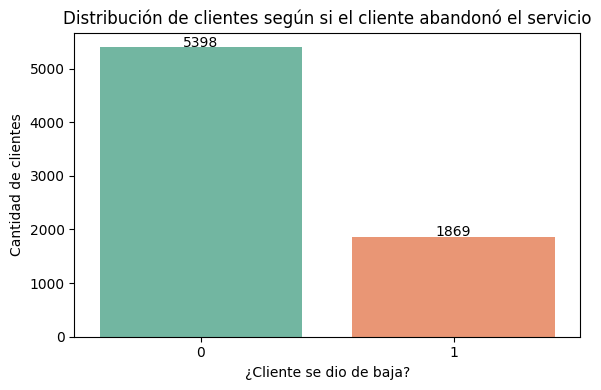

In [243]:
# -------- Gráfico de barras con totales -------- #
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=datos_TelecomX_Fla, x="Churn", palette="Set2")

# Agregar los valores encima de cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # centrado horizontal
        y=altura + 2,                     # un poco por encima de la barra
        s=f"{altura:.0f}",                # número entero
        ha="center"
    )

plt.title("Distribución de clientes según si el cliente abandonó el servicio")
plt.xlabel("¿Cliente se dio de baja?")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()


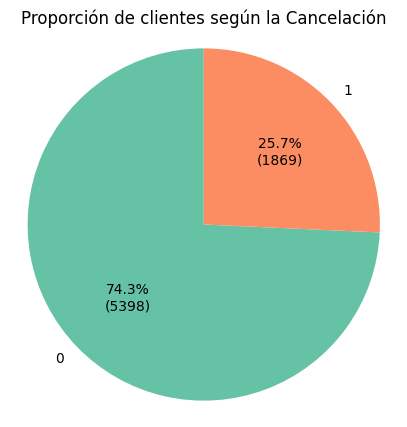

In [244]:
# -------- Gráfico de pastel con totales -------- #
import matplotlib.pyplot as plt

# Calcular los datos fuera del plt.pie()
churn_counts = datos_TelecomX_Fla["Churn"].value_counts()
churn_labels = churn_counts.index
churn_sizes = churn_counts.values

# Función para mostrar porcentaje y total
def formato_etiqueta(pct, all_vals):
    total = sum(all_vals)
    valor_abs = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({valor_abs})"

plt.figure(figsize=(5, 5))
plt.pie(
    churn_sizes,
    labels=churn_labels,
    autopct=lambda pct: formato_etiqueta(pct, churn_sizes),
    startangle=90,
    colors=["#66c2a5", "#fc8d62"]
)
plt.axis("equal")
plt.title("Proporción de clientes según la Cancelación")
plt.show()


####Alta tasa de evasión: Aproximadamente el 25,7% de los clientes ha abandonado el servicio.

##Recuento de evasión por variables categóricas

####Exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [245]:
datos_TelecomX_Fla.select_dtypes(include='object').columns


Index(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')

# Por Género

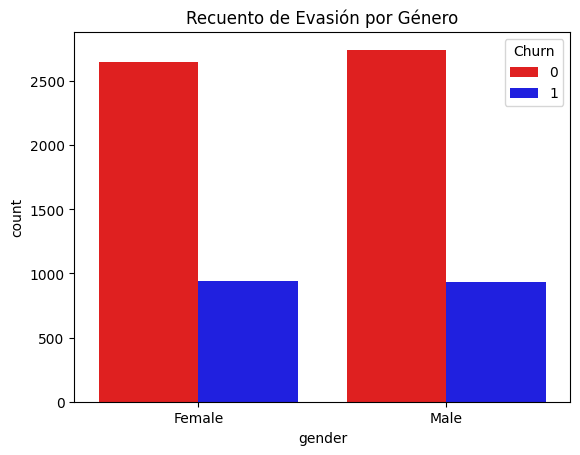

In [246]:
sns.countplot(data=datos_TelecomX_Fla, x='gender', hue='Churn', palette={0: 'red', 1: 'blue'})
plt.title('Recuento de Evasión por Género')
plt.show()

###Género (gender):

  La evasión está distribuida casi por igual entre hombres y mujeres.

  No parece haber una diferencia significativa entre géneros.

#Tipo de contrato

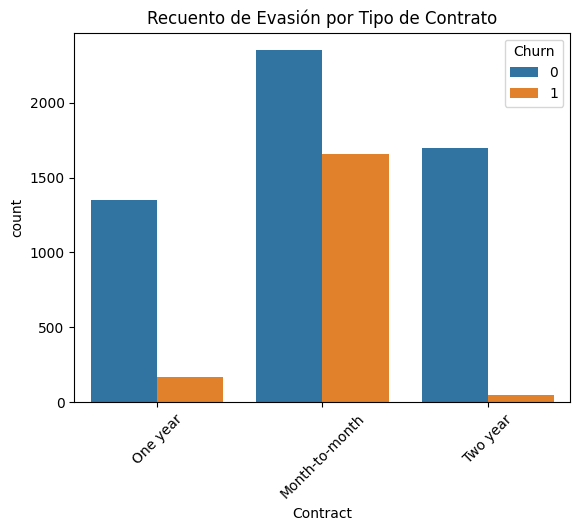

In [247]:
sns.countplot(data=datos_TelecomX_Fla, x='Contract', hue='Churn')
plt.title('Recuento de Evasión por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

###Tipo de Contrato (Contract):

  Los clientes con contratos "Mes a mes" presentan una evasión mucho mayor que los de contratos "Un año" o "Dos años".

  Esto sugiere que los contratos más largos ayudan a retener clientes.

#Método de pago

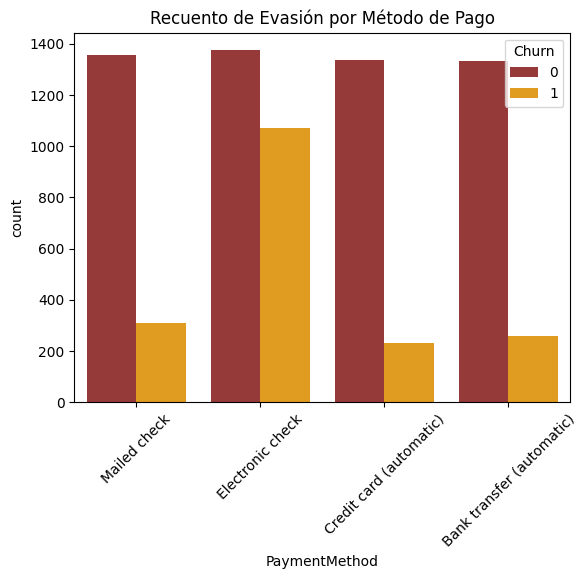

In [248]:
sns.countplot(data=datos_TelecomX_Fla, x='PaymentMethod', hue='Churn',palette={0: 'brown', 1:'orange'})
plt.title('Recuento de Evasión por Método de Pago')
plt.xticks(rotation=45)
plt.show()

###Método de Pago (PaymentMethod):

  Los clientes que usan "Electronic check" tienen una tasa de evasión visiblemente más alta.

  Métodos como tarjeta de crédito o transferencia automática parecen estar asociados con menor cancelación.

#Servivio de Internet

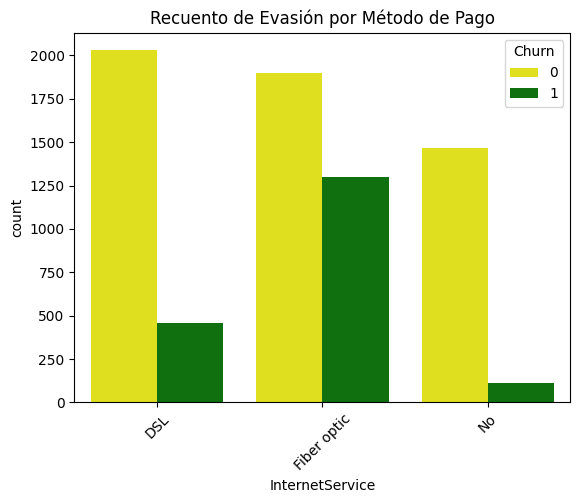

In [249]:
sns.countplot(data=datos_TelecomX_Fla, x='InternetService', hue='Churn', palette={0: 'yellow', 1:'green'})
plt.title('Recuento de Evasión por Método de Pago')
plt.xticks(rotation=45)
plt.show()

###Clientes con "Fiber optic" tienen la tasa más alta de evasión (~40%).

Los clientes sin servicio de internet son los más estables.

Esto sugiere que el servicio de fibra óptica puede necesitar atención, ya que podría estar generando insatisfacción o ser más caro.

#Servicio telefónico

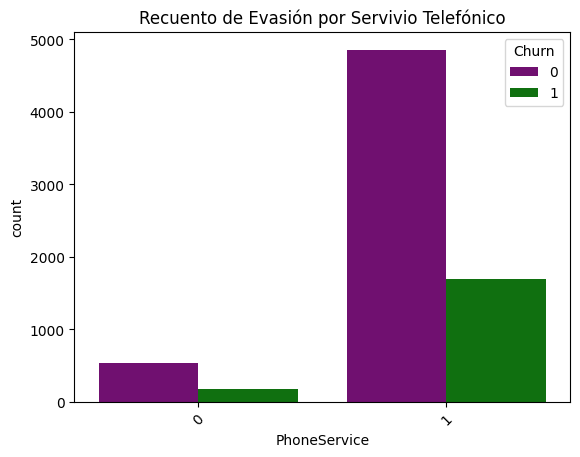

In [250]:
sns.countplot(data=datos_TelecomX_Fla, x='PhoneService', hue='Churn', palette={0: 'purple', 1:'green'})
plt.title('Recuento de Evasión por Servivio Telefónico')
plt.xticks(rotation=45)
plt.show()

El gráfico generado por el código muestra un recuento (countplot) de clientes de la empresa TelecomX según si tienen o no servicio telefónico (PhoneService), desglosado por si han renunciado al servicio (Churn), lo que se conoce como evasión o cancelación del cliente.

Este gráfico permite observar la relación entre el uso del servicio telefónico y la evasión de clientes. Las barras representan la cantidad de clientes con (Yes) o sin (No) servicio telefónico, diferenciados por color según si se han dado de baja (verde) o han permanecido como clientes (morado).

Podemos interpretar si los clientes sin servicio telefónico tienen mayor tasa de cancelación o si el servicio telefónico está asociado con una menor evasión. Por ejemplo, si la mayoría de los clientes sin servicio telefónico están en verde, podría indicar que no tener este servicio se asocia con una mayor probabilidad de cancelación.

#Factura electrónica

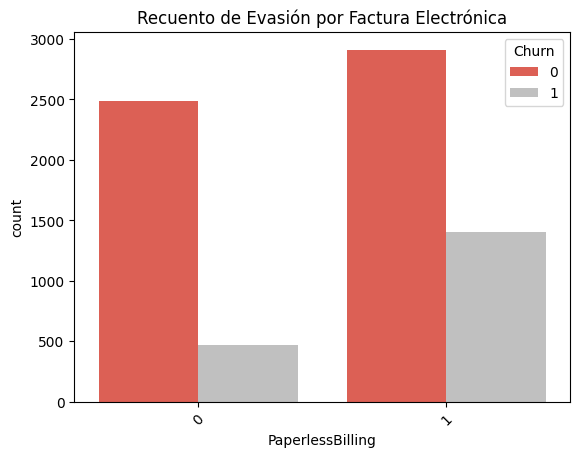

In [251]:
sns.countplot(data=datos_TelecomX_Fla, x='PaperlessBilling', hue='Churn', palette={0: '#F24D3F', 1:'silver'})
plt.title('Recuento de Evasión por Factura Electrónica')
plt.xticks(rotation=45)
plt.show()

In [252]:
# Calcular tasa de churn por PaperlessBilling
tasa_churn_paperless = datos_TelecomX_Fla.groupby('PaperlessBilling')['Churn'].mean()

print("Tasa de Churn según PaperlessBilling:")
print(tasa_churn_paperless)


Tasa de Churn según PaperlessBilling:
PaperlessBilling
0    0.158660
1    0.324751
Name: Churn, dtype: float64


El gráfico muestra un recuento de clientes según si utilizan o no el sistema de facturación electrónica (PaperlessBilling), diferenciando entre aquellos que han cancelado el servicio (Churn = 1, color plateado) y los que se han mantenido como clientes (Churn = 0, color rojo anaranjado).

Este gráfico permite analizar la posible relación entre el uso de la factura electrónica y la evasión de clientes. Se observa cuántos clientes usan (Yes) o no usan (No) este tipo de facturación, y cuántos de ellos han abandonado el servicio.

Si la barra de clientes que usan facturación electrónica presenta una mayor proporción de color plateado (Churn = 1), se podría inferir que existe una mayor tasa de cancelación entre quienes optan por la factura electrónica, lo cual podría ser un indicio de insatisfacción o un perfil de cliente más propenso a abandonar el servicio.

#Edades

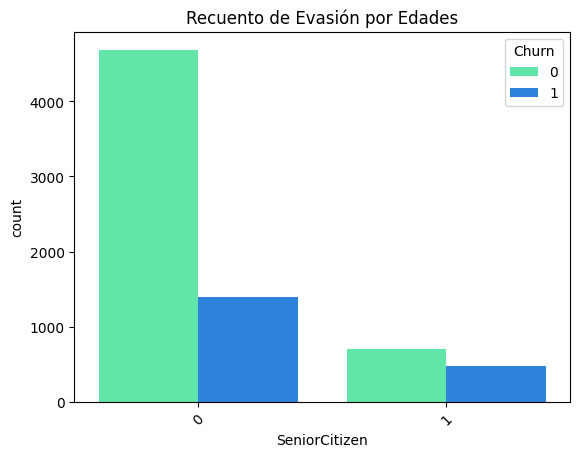

In [253]:
sns.countplot(data=datos_TelecomX_Fla, x='SeniorCitizen', hue='Churn', palette={0:'#4BFBA9', 1:'#1181F7'})
plt.title('Recuento de Evasión por Edades')
plt.xticks(rotation=45)
plt.show()

#####El gráfico generado por el código sns.countplot representa un recuento de clientes según su condición de ser adultos mayores (SeniorCitizen) y su decisión de abandonar el servicio (Churn), diferenciando visualmente los casos con colores.

######El gráfico permite observar si existe alguna diferencia en la tasa de cancelación del servicio (Churn) entre clientes mayores y no mayores. Por ejemplo, si la barra de clientes mayores que abandonaron el servicio es proporcionalmente más alta que la de los no mayores, podría sugerir que los adultos mayores cancelan más frecuentemente el servicio.

#Análisis de correlación entre variables

                     Churn  SeniorCitizen   Partner  Dependents    tenure  \
Churn             1.000000       0.146733 -0.148546   -0.161384 -0.344079   
SeniorCitizen     0.146733       1.000000  0.022970   -0.212952  0.018187   
Partner          -0.148546       0.022970  1.000000    0.448900  0.377551   
Dependents       -0.161384      -0.212952  0.448900    1.000000  0.159892   
tenure           -0.344079       0.018187  0.377551    0.159892  1.000000   
PhoneService      0.012571       0.010060  0.018828   -0.003863  0.010205   
MultipleLines     0.039343       0.144567  0.141187   -0.027894  0.331678   
OnlineSecurity   -0.166828      -0.037953  0.141392    0.083951  0.327252   
OnlineBackup     -0.080163       0.068824  0.139523    0.023686  0.361291   
DeviceProtection -0.063452       0.060358  0.153209    0.014797  0.361792   
TechSupport      -0.160440      -0.059376  0.116228    0.062586  0.322139   
StreamingTV       0.062430       0.103655  0.124754   -0.015030  0.280738   

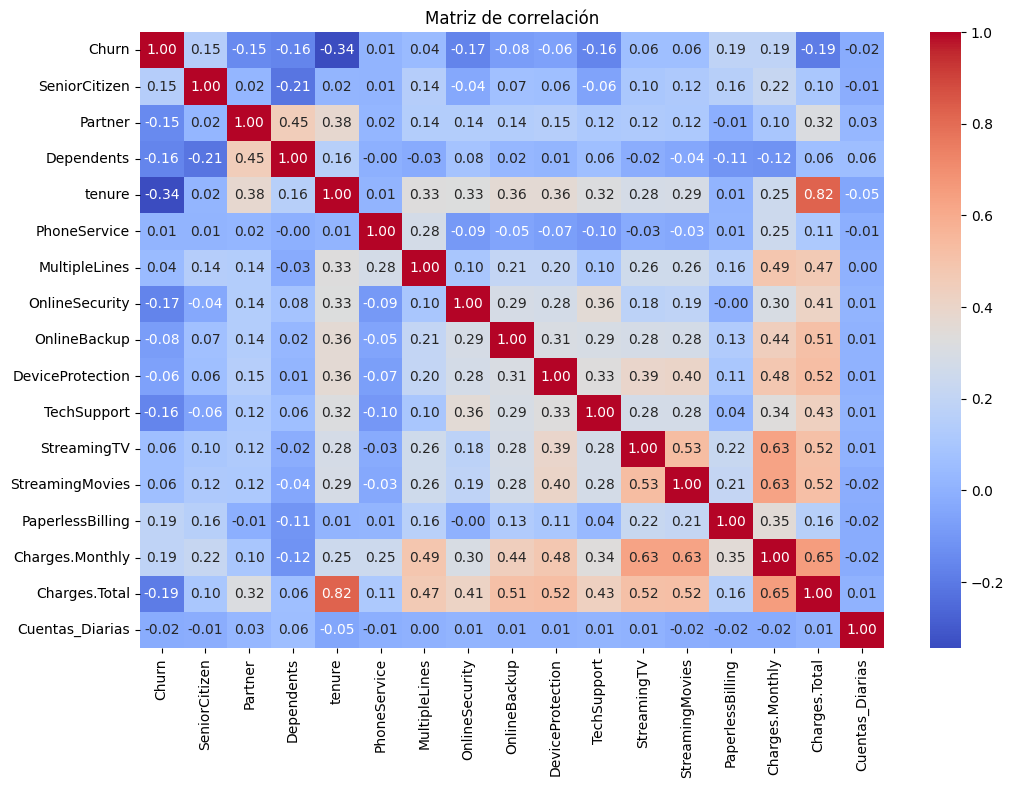

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener tu DataFrame cargado correctamente
data = datos_TelecomX_Fla  # o pd.read_csv('datos_TelecomX_Fla.csv')

# Cálculo de la correlación solo entre columnas numéricas
correlaciones = data.corr(numeric_only=True)
print(correlaciones)

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


## Interpretación: correlaciones con Churn

```Interpretación: Correlación con Churn``                                                                                                         
| `tenure             | **-0.344**              | Los clientes con más tiempo de antigüedad tienden a **no darse de baja**. Fuerte relación negativa.                                  |


| `Charges.Total`      | **-0.194**              | Mientras más ha pagado un cliente en total, **menos probable es que se dé de baja**. Aunque puede estar influenciado por la antigüedad. |


| `OnlineSecurity`     | **-0.167**              | Quienes tienen seguridad en línea tienden a **quedarse más**. Podría ser un servicio valioso.                                           |


| `TechSupport`        | **-0.160**              | Clientes con soporte técnico también **abandonan menos**. Posible valor agregado.                                                       |


| `Dependents`         | **-0.161**              | Clientes con personas a cargo (hijos, etc.) **tienen menos churn**. Tal vez más estables o con más compromiso.                          |


| `Partner`            | **-0.149**              | Tener pareja también está **ligeramente asociado a menos churn**.                                                                       |


| `SeniorCitizen`      | **0.147**               | Los adultos mayores son **más propensos a abandonar**. Puede deberse a afinidad con tecnología o precios.                               |


| `PaperlessBilling`   | **0.187**               | Facturación electrónica se asocia con **más churn**. Posiblemente es una proxy de clientes más nuevos o digitales.                      |


| `Charges.Monthly`    | **0.190**               | Cuanto más paga un cliente mensualmente, **mayor probabilidad de churn**. Tal vez precios altos generan insatisfacción.                 |


| `StreamingTV/Movies` | **0.060-0.062**         | Muy leve relación positiva con churn. Quizá quienes contratan estos servicios son más "experimentales".                                 |


| `PhoneService`       | **0.012**               | No hay relación significativa.                                                                                                          |
| `Cuentas_Diarias`    | **-0.021**              | Casi nula correlación con churn. Podría no ser una variable útil.                                                   



##📄Informe final

Informe Final - Análisis de Evasión de Clientes (Churn) en TelecomX

**1. Introducción**

El presente análisis tiene como objetivo identificar los factores que influyen en la evasión de clientes (Churn) en la empresa TelecomX. La retención de clientes es un aspecto clave en la sostenibilidad y crecimiento de cualquier compañía de servicios, ya que adquirir nuevos clientes suele ser más costoso que mantener a los actuales.

El problema del Churn consiste en detectar qué características o patrones están más asociados con la cancelación del servicio por parte de los usuarios. A través del análisis de datos y visualizaciones, buscamos generar insights valiosos que permitan a la empresa tomar decisiones estratégicas para reducir la tasa de cancelación.


**2. Limpieza y Tratamiento de Datos**

Para comenzar, se llevó a cabo una serie de pasos de preprocesamiento de los datos:

  -Importación de datos desde un archivo .csv.

  -Revisión y corrección de valores nulos o inconsistentes.

  -Conversión de variables categóricas a formato adecuado.

  -Transformación de columnas como TotalCharges, que estaba en formato string, a valores numéricos.

  -Estandarización de etiquetas en variables como Churn, SeniorCitizen, InternetService, entre otras.

Este proceso fue esencial para asegurar la calidad del análisis posterior.


**3. Análisis Exploratorio de Datos**

Se realizaron distintas visualizaciones para comprender mejor el comportamiento de los clientes:

Distribución de la variable objetivo (Churn)

  -Se observó que aproximadamente 25% de los clientes han abandonado el servicio, mientras que el 75% permanecen activos.

Relación entre Churn y otras variables:

  -Edad (SeniorCitizen): Los adultos mayores tienen una mayor tasa de cancelación.

 -![Gráfico de recuento por SeniorCitizen y Churn]

  -Tipo de contrato: Los contratos mensuales presentan una mayor tasa de Churn que los contratos anuales o de dos años.

  -Servicio de Internet: Clientes con servicio de fibra óptica mostraron mayor propensión a la cancelación.

  -Facturación electrónica (PaperlessBilling) y método de pago también se asociaron con mayor churn.

  -Total de cargos mensuales: Los clientes con cargos mensuales altos tienen más probabilidad de irse.


**4. Conclusiones e Insights**

Los principales hallazgos del análisis fueron:

  -Existe una clara relación entre tipo de contrato y Churn: los contratos mensuales tienen mayor evasión.

  -Adultos mayores son más propensos a abandonar el servicio, posiblemente por dificultades tecnológicas o menor uso del servicio.

  -El servicio de fibra óptica, aunque veloz, parece asociado a una experiencia menos satisfactoria o precios más elevados.

  -Clientes que usan facturación electrónica y pagan con métodos automáticos como tarjetas tienden a cancelar más.

Estos patrones permiten identificar segmentos de clientes con mayor riesgo de abandono, lo que puede guiar futuras estrategias de retención.


**5. Recomendaciones**

Con base en los resultados, se proponen las siguientes acciones:

  -Ofrecer incentivos y beneficios exclusivos para clientes con contratos mensuales, motivando el cambio a planes de largo plazo.

  -Diseñar campañas de retención orientadas a adultos mayores, con atención personalizada y asistencia técnica.

  -Revisar la experiencia del cliente con el servicio de fibra óptica, identificando posibles causas de insatisfacción.

  -Implementar alertas tempranas para clientes con cargos altos y métodos de pago automáticos, ofreciendo promociones o asesorías.

  -Segmentar la base de clientes según riesgo de evasión y realizar intervenciones proactivas.

